<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and Validate

In [132]:
telco=pd.read_csv("customer_churn_train.csv")

In [133]:
telco.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [134]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [135]:
telco.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# EDA

**What is Customer Churn Ratio ?**

In [136]:
telco['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

**What is Customer Churn Ratio  Statewise?**

In [137]:
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     False    40
       True      3
AL     False    59
       True      7
AR     False    36
                ..
WI     True      4
WV     False    81
       True      7
WY     False    58
       True      8
Name: count, Length: 102, dtype: int64

**Distribution of account length**

Account Length: the number of days that this account has been active.

<ipython-input-138-bd693668ef79>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco["Account length"])


<Axes: xlabel='Account length', ylabel='Density'>

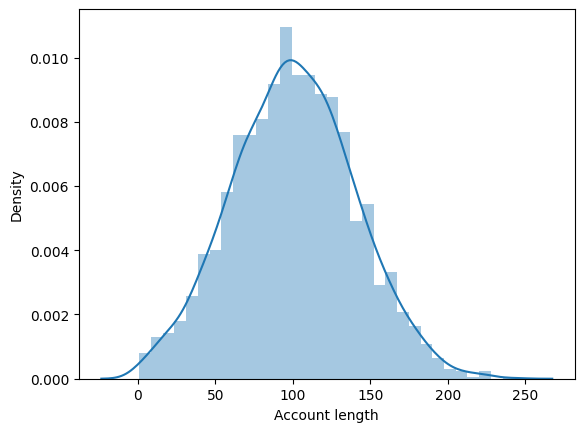

In [138]:
sns.distplot(telco["Account length"])

Above is normally distributed data.let's see distribution churn wise.Also looking at if customer has international plan

There is no difference between account length distribution for customers with international plan

<ipython-input-139-f0f31162ee51>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Total day minutes'])


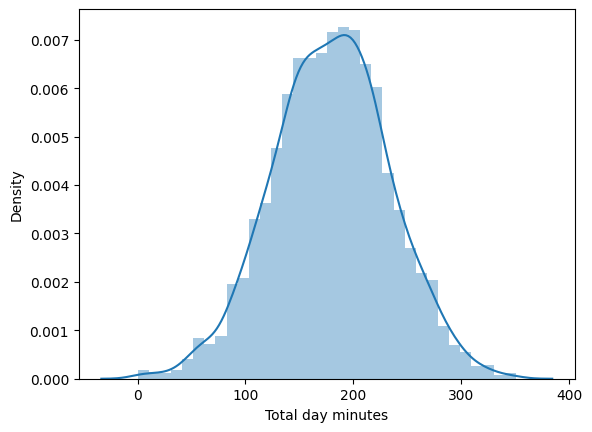

In [139]:
sns.distplot(telco['Total day minutes'])
plt.show()

<ipython-input-140-754f093b01bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Total night minutes'])


<Axes: xlabel='Total night minutes', ylabel='Density'>

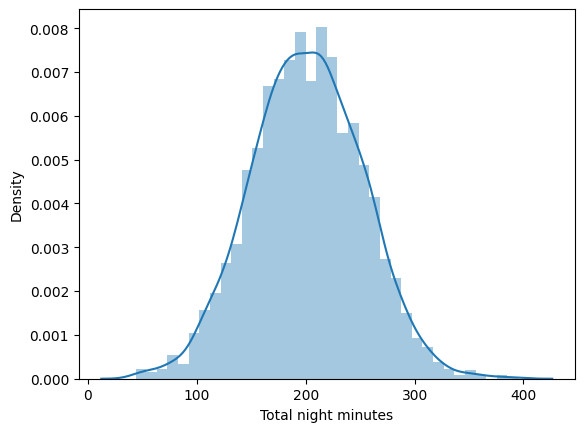

In [140]:
sns.distplot(telco['Total night minutes'])


<ipython-input-141-8021f26e11d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Total eve minutes'])


<Axes: xlabel='Total eve minutes', ylabel='Density'>

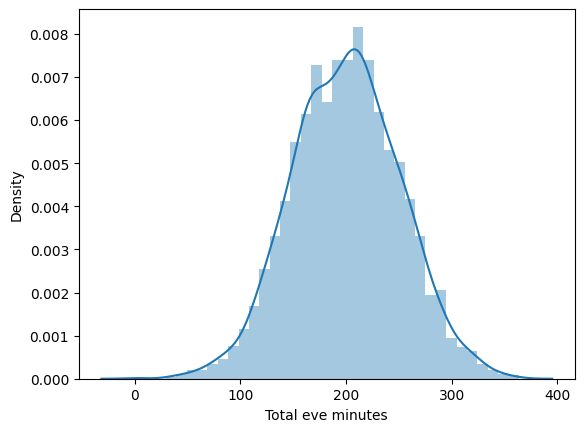

In [141]:
sns.distplot(telco['Total eve minutes'])

<ipython-input-142-a30495575987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco['Total intl minutes'])


<Axes: xlabel='Total intl minutes', ylabel='Density'>

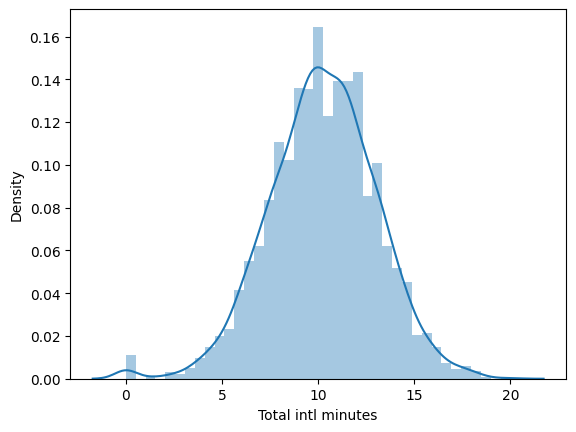

In [142]:
sns.distplot(telco['Total intl minutes'])

All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

<Axes: xlabel='Churn', ylabel='Customer service calls'>

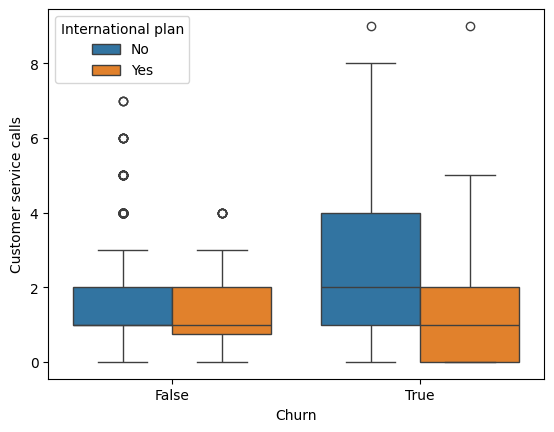

In [143]:
sns.boxplot(x = 'Churn',
          y = 'Customer service calls',
          data = telco,hue='International plan')

 There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.



# Data Preparation

**Need**

- Some machine learning models assume that data is normally distributed

- features are on same scale

  - lead to need of scaling and normalization

- All machine learning models work on numeric data types
 -  brings need of encode categorical variables to numeric type

In [144]:
telco.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

# Feature Engineering

In [145]:
telco['Avg_Night_Calls']=telco['Total night minutes']/telco['Total night calls']
telco['Avg_Night_Calls'].head()

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64

In [146]:
# view unique values of categorical columns
categorical_variables=telco.select_dtypes(include=['object','bool']).columns.tolist()
categorical_variables

['State', 'International plan', 'Voice mail plan', 'Churn']

In [147]:
for col in categorical_variables:
  print(col,":", telco[col].unique())

State : ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
International plan : ['No' 'Yes']
Voice mail plan : ['Yes' 'No']
Churn : [False  True]


## Encoding Categorical Features

> Add blockquote



### Option 1 - replace method

In [148]:
## Option 1 - replace method
# telco['Churn']=telco['Churn'].replace({False:0,True:1})
# telco['Churn'].head()

In [149]:
telco['Voice mail plan']=telco['Voice mail plan'].replace({"No":0,"Yes":1})
telco['Voice mail plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Voice mail plan, dtype: int64

In [150]:
telco['International plan']=telco['International plan'].replace({"No":0,"Yes":1})
telco['International plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: International plan, dtype: int64

### Option 1 - replace method

In [151]:
## Option 2 - LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# telco['International plan']=LabelEncoder().fit_transform(telco['International plan'])
# telco['International plan'].head()


When to use LabelEncoding

In [152]:

# telco['State']=LabelEncoder().fit_transform(telco['State'])
# telco['State'].head()

### Option - 3 - Get dummies method

In [153]:
telco_state = pd.get_dummies(telco['State'],drop_first=True).astype(int)
telco_state.head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
# Drop the original 'State' column from the DataFrame
telco = telco.drop(columns=['State'])

# Concatenate the one-hot encoded columns with the DataFrame
telco = pd.concat([telco, telco_state], axis=1)


### Ordinal Encoding

In [155]:
## If there exists ordinal realtionship

## Feature Scaling

Most models expect data on same scale and its rarely true in real world data

In [156]:
telco['Total intl calls'].describe()

count    2666.000000
mean        4.467367
std         2.456195
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

In [157]:
telco['Total night minutes'].describe()

count    2666.000000
mean      201.168942
std        50.780323
min        43.700000
25%       166.925000
50%       201.150000
75%       236.475000
max       395.000000
Name: Total night minutes, dtype: float64

As we can see the example values are on different scale.So we need to rescale our data and make sure they are on same scale

## Standarization (z-score)

In [158]:
telco.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [159]:
telco_numcol=telco.select_dtypes(include=['int','float']).columns.tolist()
telco_numcol

['Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Avg_Night_Calls',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [160]:
from sklearn.preprocessing import StandardScaler

num_telco= ['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
            'Avg_Night_Calls']
# Scale only the numerical columns
telco_scaled = StandardScaler().fit_transform(telco[num_telco])

# Create a DataFrame with scaled numerical columns
telco_scaled_df = pd.DataFrame(telco_scaled, columns=num_telco)

# Drop original numerical columns from the original DataFrame
telco.drop(columns=num_telco, inplace=True)

# Concatenate the original DataFrame with the scaled numerical columns
telco = pd.concat([telco, telco_scaled_df], axis=1)

# Print the updated DataFrame
print(telco[num_telco].describe())



       Account length  Number vmail messages  Total day minutes  \
count    2.666000e+03           2.666000e+03       2.666000e+03   
mean    -1.292623e-16          -2.665202e-17       1.399231e-16   
std      1.000188e+00           1.000188e+00       1.000188e+00   
min     -2.518430e+00          -5.894135e-01      -3.311458e+00   
25%     -6.982511e-01          -5.894135e-01      -6.657103e-01   
50%     -1.568400e-02          -5.894135e-01       8.641661e-03   
75%      6.668831e-01           8.066471e-01       6.719236e-01   
max      3.599393e+00           3.084430e+00       3.160845e+00   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count     2.666000e+03      2.666000e+03       2.666000e+03     2.666000e+03   
mean      2.212117e-16     -2.198791e-16      -1.119385e-16     3.104960e-16   
std       1.000188e+00      1.000188e+00       1.000188e+00     1.000188e+00   
min      -5.019422e+00     -3.311525e+00      -3.933617e+00    -4.962065e+00

## Min Max Scaling

# Feature Selection And Engineering

Process of choosing which features to use in modelling is called **feature selection**

- Dropping Unncessary Features
- Highly correlated features can be dropped as they provide no additional information

**feature engineering** on the other hand is creating new features based on domain understing and subject matter expertise  that capture complex relationships and patterns in the data that might not be captured by the original features alone.
It is also used for handling missing values and outliers



In [161]:
corr_matrix=telco[num_telco].corr()

<Axes: >

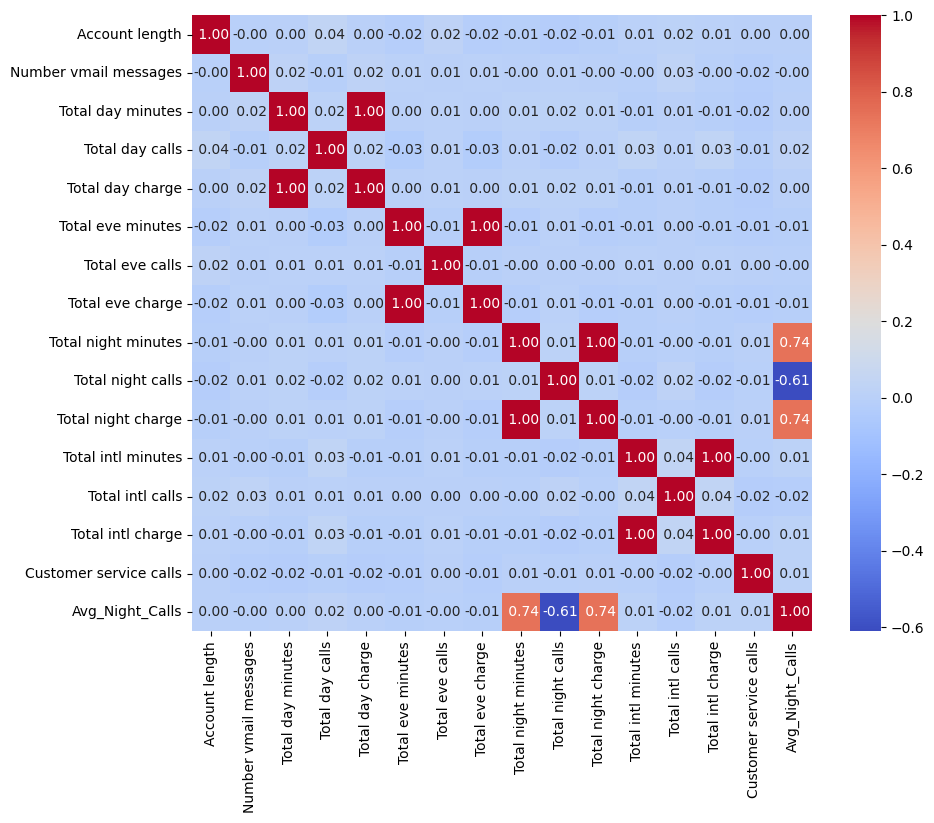

In [162]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=" .2f")

# Making Predictions

### Split into features and target

In [163]:
y=telco['Churn']
X=telco.drop(columns=['Churn'])

In [165]:
telco_test=pd.read_csv('customer_churn_test.csv')


#### Test Data Prepration

In [166]:
telco_test['Avg_Night_Calls']=telco_test['Total night minutes']/telco_test['Total night calls']
telco_test['Avg_Night_Calls'].head()

0    2.397778
1    1.881081
2    1.254687
3    1.805714
4    1.985556
Name: Avg_Night_Calls, dtype: float64

In [167]:
telco_test['Voice mail plan']=telco_test['Voice mail plan'].replace({"No":0,"Yes":1})
telco_test['Voice mail plan'].head()

0    0
1    0
2    0
3    0
4    0
Name: Voice mail plan, dtype: int64

In [168]:
telco_test['International plan']=telco_test['International plan'].replace({"No":0,"Yes":1})
telco_test['International plan'].head()

0    0
1    0
2    0
3    0
4    0
Name: International plan, dtype: int64

In [169]:
telco_test_state = pd.get_dummies(telco_test['State'],drop_first=True).astype(int)
telco_test_state.head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
# Drop the original 'State' column from the DataFrame
telco_test = telco_test.drop(columns=['State'])

# Concatenate the one-hot encoded columns with the DataFrame
telco_test = pd.concat([telco_test, telco_test_state], axis=1)


In [171]:
# Scale only the numerical columns
telco_scaled_test = StandardScaler().fit_transform(telco_test[num_telco])

# Create a DataFrame with scaled numerical columns
telco_scaled_df_test = pd.DataFrame(telco_scaled_test, columns=num_telco)

# Drop original numerical columns from the original DataFrame
telco_test.drop(columns=num_telco, inplace=True)

# Concatenate the original DataFrame with the scaled numerical columns
telco_test = pd.concat([telco_test, telco_scaled_df_test], axis=1)

# Print the updated DataFrame
print(telco_test[num_telco].describe())



       Account length  Number vmail messages  Total day minutes  \
count    6.670000e+02           6.670000e+02       6.670000e+02   
mean    -4.261126e-17           4.660606e-17       1.318286e-16   
std      1.000750e+00           1.000750e+00       1.000750e+00   
min     -2.496786e+00          -6.012446e-01      -2.795322e+00   
25%     -6.580491e-01          -6.012446e-01      -6.255634e-01   
50%     -2.062032e-02          -6.012446e-01      -4.774237e-02   
75%      6.168085e-01           8.289628e-01       7.166761e-01   
max      3.166524e+00           3.045784e+00       2.764741e+00   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count     6.670000e+02      6.670000e+02       6.670000e+02     6.670000e+02   
mean     -5.592728e-17      1.904191e-16       1.917507e-16     3.462165e-16   
std       1.000750e+00      1.000750e+00       1.000750e+00     1.000750e+00   
min      -3.480463e+00     -2.795703e+00      -3.124982e+00    -3.352519e+00

In [174]:
y_test_act=telco_test['Churn']
X_test=telco_test.drop(columns=['Churn'])

### Train a Model using appropriate algorithm

In [191]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
model_svc=svc.fit(X,y)
model_dt=dt.fit(X,y)
model_lr=lr.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [194]:
y_predict_svc=model_svc.predict(X_test)
y_predict_svc


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [195]:
y_predict_dt=model_dt.predict(X_test)
y_predict_dt

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [196]:
y_predict_lr=model_dt.predict(X_test)
y_predict_lr

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,

In [199]:
y_predict_dt[1:5]

array([False,  True, False, False])

In [197]:
y_predict_lr[1:5]

array([False,  True, False, False])

In [198]:
y_test_act[1:5]

1     True
2     True
3    False
4    False
Name: Churn, dtype: bool

## Performance Evaluation